In [1]:
# Import numpy+extensions, i/o functions, preprocessing, and visualization.
import numpy as numx
import pydeep.base.numpyextension as numxext
import pydeep.misc.io as io
import pydeep.preprocessing as pre
import pydeep.misc.visualization as vis
import math
# Model imports: RBM estimator, model and trainer module
import pydeep.rbm.estimator as estimator
import pydeep.rbm.model as model
import pydeep.rbm.trainer as trainer

import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<h1> Random Rotation in 3D Space

In [2]:
def random_rotation_matrix():
    alpha = np.random.uniform(low = 0,high = 2*np.pi)
    beta = np.random.uniform(low = 0,high = 2*np.pi)
    gamma = np.random.uniform(low = 0,high = 2*np.pi)
    A = np.zeros((3,3))
    A[0][0] = np.cos(alpha)*np.cos(beta)
    A[0][1] = np.cos(alpha)*np.sin(beta)*np.sin(gamma) - np.sin(alpha)*np.cos(gamma)
    A[0][2] = np.cos(alpha)*np.sin(beta)*np.cos(gamma) + np.sin(alpha)*np.sin(gamma)
    A[1][0] = np.sin(alpha)*np.cos(beta)
    A[1][1] = np.sin(alpha)*np.sin(beta)*np.sin(gamma) + np.cos(alpha)*np.cos(gamma)
    A[1][2] = np.sin(alpha)*np.sin(beta)*np.cos(gamma) - np.cos(alpha)*np.sin(gamma)
    A[2][0] = -np.sin(beta)
    A[2][1] = np.cos(beta)*np.sin(gamma)
    A[2][2] = np.cos(beta)*np.cos(gamma)
    return A

In [3]:
def rotate_data(A,data):
    data = np.array(data)
    m = np.shape(data)[1]
    #print(type(data))
    for i in range(m):
        #print(data[:,i])
        data[:,i] = np.matmul(A,data[:,i])
    return data

<h1>Noisy Rodney

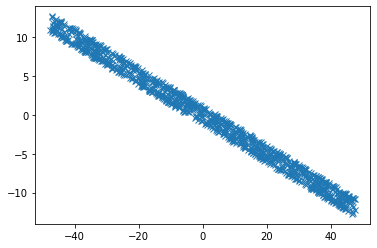

In [4]:
def return_rod(m,r,z_stretch):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    z_eps = np.random.normal(size = m)*noise_parameter
    x_eps = np.random.normal(size = m)*noise_parameter
    # create dataset 
    Theta = 2*np.pi*np.random.rand(m) - np.pi
    #X = r*(1+x_eps)*np.cos(Theta)
    X = r*(1+x_eps)*np.cos(Theta)
    Y = np.random.uniform(low= -z_stretch/2,high = z_stretch/2,size = m)
    Z = r*(1+z_eps)*np.sin(Theta)
    data_rod = np.array([X,Y,Z])
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_rod)
    data_rod = np.array([X,Y,Z])
    return data_rod

[X,Y,Z] = return_rod(1000,1,100) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

Text(0.5, 0.92, 'A rare sighting of Rodney')

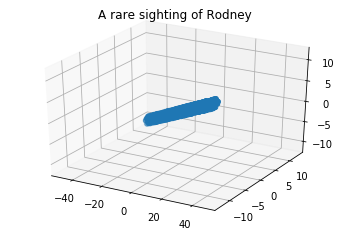

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)
plt.title('A rare sighting of Rodney')

<h1>Don't be Square

i m a lumberjack and i m okay



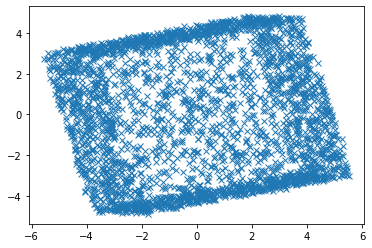

In [6]:
def return_square(m):
    m = m//6;
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    L  = np.random.uniform(1,10)
    
    X1 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y1 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z1 = np.zeros(m)+(L/2+z_eps)
    
    X2 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y2 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z2 = np.zeros(m)+(-L/2+z_eps)
    
    X3 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y3 = np.zeros(m)+(L/2+y_eps)
    Z3 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X4 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Y4 = np.zeros(m)+(-L/2+y_eps)
    Z4 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X5 = np.zeros(m)+(L/2+x_eps)
    Y5 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z5 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
    X6 = np.zeros(m)+(-L/2+x_eps)
    Y6 = np.random.uniform(low = -L/2, high= L/2,size = m)
    Z6 = np.random.uniform(low = -L/2, high= L/2,size = m)
    
#    data_ellipsoid = np.array([[X1,Y1,Z1],[X2,Y2,Z2],[X3,Y3,Z3],[X4,Y4,Z4],[X5,Y5,Z5],[X6,Y6,Z6]])
    d1 = np.array([X1,Y1,Z1])
    d2 = np.array([X2,Y2,Z2])
    d3 = np.array([X3,Y3,Z3])
    d4 = np.array([X4,Y4,Z4])
    d5 = np.array([X5,Y5,Z5])
    d6 = np.array([X6,Y6,Z6])
    print("i m a lumberjack and i m okay")
    data_square = np.hstack((d1,d2,d3,d4,d5,d6))
    data_square = np.array(data_square)
    print("")
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_square)
    data_square = np.array([X,Y,Z])
    return data_square

[X,Y,Z] = return_square(3000) #This would be an m by 3 array of coordinates which could be put into the neural network.

plt.plot(X,Y, 'x')

Text(0.5, 0.92, 'A square')

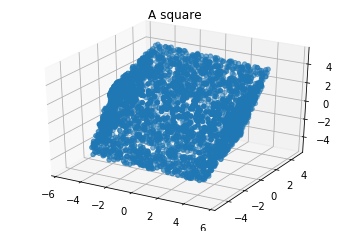

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)
plt.title('A square')

<h3>Noisy Sphere Data

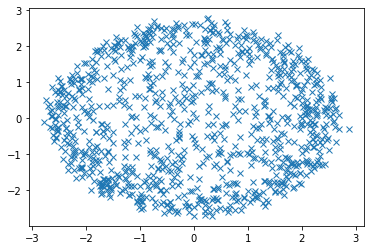

In [39]:
def return_sphere(m):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    r = np.random.uniform(1,3)
#    r = 2
    label = round(r)
    # create dataset
    
    theta = 2*np.pi*np.random.uniform(low=0,high=1,size=m)
    phi = np.arccos(1 - 2 * np.random.uniform(low=0,high=1,size=m))
    X = r*(1+x_eps)*np.sin(phi) * np.cos(theta)
    Y = r*(1+y_eps)*np.sin(phi) * np.sin(theta)
    Z = r*(1+y_eps)*np.cos(phi)
    
    data_sphere = np.array([X,Y,Z])
    return data_sphere, label 

[X,Y,Z], label = return_sphere(1000) #This would be an m by 3 array of coordinates which could be put into the neural network.
plt.plot(X,Y, 'x')

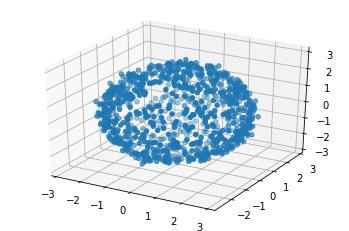

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X,Y,Z)

<h3>Noisy Ellipsoid

In [41]:
def return_ellipsoid(m,a_x,b_y,c_z):
    noise_parameter = 0.05 #amount of noise away from a true sphere.
    x_eps = np.random.normal(size = m)*noise_parameter
    y_eps = np.random.normal(size = m)*noise_parameter
    z_eps = np.random.normal(size = m)*noise_parameter
    # create dataset
    Phi = 2*np.pi*np.random.rand(m) - np.pi
    Theta = np.pi*np.random.rand(m) - 0.5*np.pi
    X = a_x*(1+x_eps)*np.cos(Theta)*np.cos(Phi)
    Y = b_y*(1+y_eps)*np.cos(Theta)*np.sin(Phi)
    Z = c_z*(1+z_eps)*np.sin(Theta)
    data_ellipsoid = np.array([X,Y,Z])
    #print(type(data_ellipsoid))
    # plt.plot(X,Y, 'x')
    # #Plotting 3D ellipsoid
    # fig = plt.figure()
    # ax = plt.axes(projection='3d')
    # ax.scatter(X,Y,Z)
    
### Randomly Rotating the ellipsoid
    A = random_rotation_matrix()
    [X,Y,Z] = rotate_data(A,data_ellipsoid)
    data_ellipsoid = np.array([X,Y,Z])

    return data_ellipsoid

In [42]:
## Set random seed (optional)
## (optional, if stochastic processes are involved we get the same results)
numx.random.seed(42)

In [ ]:
training_data_size = 40000
group_size = training_data_size//2
data_size = 500
training_set = np.zeros((training_data_size,3,data_size))
for i in range(group_size):
    training_set[i,:,:],label_sphere = return_sphere(data_size)
    stretch_factor = np.random.uniform(low = 30, high = 40)
#    stretch_factor = 8
    training_set[group_size+i,:,:] = return_ellipsoid(data_size,stretch_factor,1,1)
#training_set[:group_size,:] = np.random.uniform(size =(group_size,data_size))
#training_set[group_size:,:] = np.random.normal(size =(group_size,data_size))
#print(training_set[0])
training_set = np.random.permutation(training_set)
#print(training_set[0])
data = torch.FloatTensor(training_set)
#print(np.shape(data))
#print(data_tensor[-1])
data = data.reshape([training_data_size,3*data_size]) 
data = data.numpy()
print(type(data))
print(np.shape(data))

In [ ]:
# Set input/output dimensions
v1 = data_size * 3
v2 = 1
h1 = 20
h2 = 1

# Whiten data using ZCA
zca = pre.ZCA(v1 * v2)
zca.train(data)
data = zca.project(data)

In [ ]:
# Split into training/test dataw
train_data = data[0:20000]
test_data = data[20000:40000]

#Set restriction factor, learning rate, batch size and maximal number of epochs
restrict = 0.01 * numx.max(numxext.get_norms(train_data, axis=1))
eps = 0.1
batch_size = 500
max_epochs = 100

In [ ]:
# Create model, initial weights=Glorot init., initial sigma=1.0, initial bias=0,
# no centering (Usually pass the data=training_data for a automatic init. that is
# set the bias and sigma to the data mean and data std. respectively, for
# whitened data centering is not an advantage)
rbm = model.GaussianBinaryVarianceRBM(number_visibles=v1 * v2,
                                      number_hiddens=h1 * h2,
                                      initial_weights='AUTO',
                                      initial_visible_bias=0,
                                      initial_hidden_bias=0,
                                      initial_sigma=1.0,
                                      initial_visible_offsets=0.0,
                                      initial_hidden_offsets=0.0,
                                      dtype=numx.float64)

# Set the hidden bias such that the scaling factor is 0.01
rbm.bh = -(numxext.get_norms(rbm.w + rbm.bv.T, axis=0) - numxext.get_norms(
    rbm.bv, axis=None)) / 2.0 + numx.log(0.01)
rbm.bh = rbm.bh.reshape(1, h1 * h2)

In [32]:
# Training with CD-1
k = 1
trainer_cd = trainer.CD(rbm)

# Train model, status every 10th epoch
step = 10
print('Training')
print('Epoch\tRE train\tRE test')
for epoch in range(0, max_epochs + 1, 1):

    # Shuffle training samples (optional)
    train_data = numx.random.permutation(train_data)

    # Print epoch and reconstruction errors every 'step' epochs.
    if epoch % step == 0:
        RE_train = numx.mean(estimator.reconstruction_error(rbm, train_data))
        RE_test = numx.mean(estimator.reconstruction_error(rbm, test_data))
        print('%5d \t%0.5f \t%0.5f' % (epoch, RE_train, RE_test))

    # Train one epoch with gradient restriction/clamping
    # No weight decay, momentum or sparseness is used
    for b in range(0, train_data.shape[0], batch_size):
        trainer_cd.train(data=train_data[b:(b + batch_size), :],
                         num_epochs=1,
                         epsilon=[eps, 0.0, eps, eps * 0.1],
                         k=k,
                         momentum=0.0,
                         reg_l1norm=0.0,
                         reg_l2norm=0.0,
                         reg_sparseness=0,
                         desired_sparseness=None,
                         update_visible_offsets=0.0,
                         update_hidden_offsets=0.0,
                         offset_typ='00',
                         restrict_gradient=restrict,
                         restriction_norm='Cols',
                         use_hidden_states=False,
                         use_centered_gradient=False)


Training
Epoch	RE train	RE test
    0 	1.00606 	0.99183
   10 	1.00047 	0.98980
   20 	0.99818 	0.98950
   30 	0.99748 	0.98959
   40 	0.99717 	0.98972
   50 	0.99700 	0.98983
   60 	0.99691 	0.98993
   70 	0.99686 	0.99005
   80 	0.99685 	0.99012
   90 	0.99682 	0.99018
  100 	0.99682 	0.99026


In [33]:
# print(rbm.w)
# print(rbm.bh)
# print(rbm.output_dim)

<class 'numpy.ndarray'>
(10000, 1500)


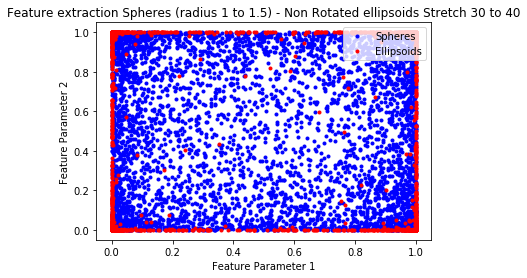

In [34]:
from pydeep.base.activationfunction import Sigmoid
import pydeep.rbm.dbn as dbn

test_data_size = 10000           
group_size = test_data_size//2
data_size = 500
test_set = np.zeros((test_data_size,3,data_size))
label_sphere = np.zeros(group_size)
label_ellipsoid= np.zeros(group_size)
for i in range(group_size):
    test_set[i,:,:],label_sphere[i] = return_sphere(data_size)
    stretch_factor = np.random.uniform(low = 30, high = 40)
#    stretch_factor = 8
    label_ellipsoid[i] = stretch_factor
    test_set[group_size+i,:,:] = return_ellipsoid(data_size,stretch_factor,1,1)
data = torch.FloatTensor(test_set)
data = data.reshape([test_data_size,3*data_size]) 
data = data.numpy()
print(type(data))
print(np.shape(data))

number_of_points = test_data_size       # number of training examples (spheres and ellipsoids)

sphere_points    = data[0:group_size]   # the first half of the data array are spheres

ellipsoid_points = data[group_size:test_data_size] # the last half of the data array are ellipsoids

ellipsoid_feature1 = np.zeros(number_of_points//2)  # we have as many ellipsoid feature1s as there are ellipsoids (i.e. half of the test data)
ellipsoid_feature2 = np.zeros(number_of_points//2)
ellipsoid_feature3 = np.zeros(number_of_points//2)
ellipsoid_feature4 = np.zeros(number_of_points//2)
ellipsoid_feature5 = np.zeros(number_of_points//2)
ellipsoid_feature6 = np.zeros(number_of_points//2)
ellipsoid_feature7 = np.zeros(number_of_points//2)
ellipsoid_feature8 = np.zeros(number_of_points//2)
ellipsoid_feature9 = np.zeros(number_of_points//2)
ellipsoid_feature10 = np.zeros(number_of_points//2)
ellipsoid_feature11 = np.zeros(number_of_points//2)
ellipsoid_feature12 = np.zeros(number_of_points//2)
ellipsoid_feature13 = np.zeros(number_of_points//2)
ellipsoid_feature14 = np.zeros(number_of_points//2)
ellipsoid_feature15 = np.zeros(number_of_points//2)
ellipsoid_feature16 = np.zeros(number_of_points//2)
ellipsoid_feature17 = np.zeros(number_of_points//2)
ellipsoid_feature18 = np.zeros(number_of_points//2)
ellipsoid_feature19 = np.zeros(number_of_points//2)
ellipsoid_feature20 = np.zeros(number_of_points//2)

sphere_feature1 = np.zeros(number_of_points//2)
sphere_feature2 = np.zeros(number_of_points//2)
sphere_feature3 = np.zeros(number_of_points//2)
sphere_feature4 = np.zeros(number_of_points//2)
sphere_feature5 = np.zeros(number_of_points//2)
sphere_feature6 = np.zeros(number_of_points//2)
sphere_feature7 = np.zeros(number_of_points//2)
sphere_feature8 = np.zeros(number_of_points//2)
sphere_feature9 = np.zeros(number_of_points//2)
sphere_feature10 = np.zeros(number_of_points//2)
sphere_feature11 = np.zeros(number_of_points//2)
sphere_feature12 = np.zeros(number_of_points//2)
sphere_feature13 = np.zeros(number_of_points//2)
sphere_feature14 = np.zeros(number_of_points//2)
sphere_feature15 = np.zeros(number_of_points//2)
sphere_feature16 = np.zeros(number_of_points//2)
sphere_feature17 = np.zeros(number_of_points//2)
sphere_feature18 = np.zeros(number_of_points//2)
sphere_feature19 = np.zeros(number_of_points//2)
sphere_feature20 = np.zeros(number_of_points//2)

for i in range(number_of_points//2):

    sphere_feature = Sigmoid.f(numx.dot(rbm.w.T,sphere_points[i])+ rbm.bv.T)   
    ellipsoid_feature =  Sigmoid.f(numx.dot(rbm.w.T,ellipsoid_points[i]) + rbm.bv.T)
    
###    uniform_feature = dbn.forward_propagate(uniform_points[i], sample=False)
###    normal_feature = dbn.forward_propagate(normal_points[i], sample=False)
###    uniform_feature= uniform_feature.detach().numpy()
###    normal_feature = normal_feature.detach().numpy()
#    normal_feature1[i] = normal_feature1[i].bcast(1,2)

    ellipsoid_feature1[i] = ellipsoid_feature[0,0]
    ellipsoid_feature2[i] = ellipsoid_feature[0,1]
    ellipsoid_feature3[i] = ellipsoid_feature[0,2]
    ellipsoid_feature4[i] = ellipsoid_feature[0,3]
    ellipsoid_feature5[i] = ellipsoid_feature[0,4]
    ellipsoid_feature6[i] = ellipsoid_feature[0,5]
    ellipsoid_feature7[i] = ellipsoid_feature[0,6]
    ellipsoid_feature8[i] = ellipsoid_feature[0,7]
    ellipsoid_feature9[i] = ellipsoid_feature[0,8]
    ellipsoid_feature10[i] = ellipsoid_feature[0,9]
    ellipsoid_feature11[i] = ellipsoid_feature[0,10]
    ellipsoid_feature12[i] = ellipsoid_feature[0,11]
    ellipsoid_feature13[i] = ellipsoid_feature[0,12]
    ellipsoid_feature14[i] = ellipsoid_feature[0,13]
    ellipsoid_feature15[i] = ellipsoid_feature[0,14]
    ellipsoid_feature16[i] = ellipsoid_feature[0,15]
    ellipsoid_feature17[i] = ellipsoid_feature[0,16]
    ellipsoid_feature18[i] = ellipsoid_feature[0,17]
    ellipsoid_feature19[i] = ellipsoid_feature[0,18]
    ellipsoid_feature20[i] = ellipsoid_feature[0,19]
    
    sphere_feature1[i] = sphere_feature[0,0]
    sphere_feature2[i] = sphere_feature[0,1]
    sphere_feature3[i] = sphere_feature[0,2]
    sphere_feature4[i] = sphere_feature[0,3]
    sphere_feature5[i] = sphere_feature[0,4]
    sphere_feature6[i] = sphere_feature[0,5]
    sphere_feature7[i] = sphere_feature[0,6]
    sphere_feature8[i] = sphere_feature[0,7]
    sphere_feature9[i] = sphere_feature[0,8]
    sphere_feature10[i] = sphere_feature[0,9]
    sphere_feature11[i] = sphere_feature[0,10]
    sphere_feature12[i] = sphere_feature[0,11]
    sphere_feature13[i] = sphere_feature[0,12]
    sphere_feature14[i] = sphere_feature[0,13]
    sphere_feature15[i] = sphere_feature[0,14]
    sphere_feature16[i] = sphere_feature[0,15]
    sphere_feature17[i] = sphere_feature[0,16]
    sphere_feature18[i] = sphere_feature[0,17]
    sphere_feature19[i] = sphere_feature[0,18]
    sphere_feature20[i] = sphere_feature[0,19]
    
plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
#plt.title('Feature Extraction for Spheres vs Ellipsoids')
plt.title("Feature extraction Spheres (radius 1 to 1.5) - Non Rotated ellipsoids Stretch 30 to 40")

plt.plot(sphere_feature1,sphere_feature2,'b.',label='Spheres')
plt.plot(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')


plt.legend(loc='upper right')
plt.show()


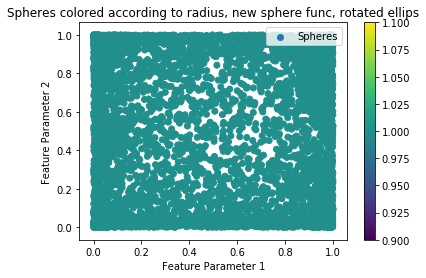

In [35]:
# Plotting spheres according to radius

plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
plt.title('Spheres colored according to radius, new sphere func, rotated ellips')
plt.scatter(sphere_feature1,sphere_feature2,c=label_sphere,label='Spheres')
cb = plt.colorbar()
#loc = np.arange(0,max(label_sphere),max(label_sphere)/float(len(colors)))
#cb.set_ticks(loc)
#cb.set_ticklabels(colors)
#plt.scatter(ellipsoid_feature1,ellipsoid_feature2,'r.',label='Ellipsoids')

plt.legend(loc='upper right')
plt.show()


##print(np.size(uniform_feature))

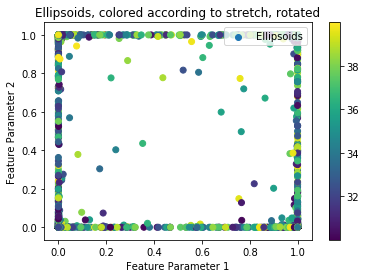

In [36]:
# Plotting Ellipsoids according to radius

plt.figure()
plt.xlabel('Feature Parameter 1')
plt.ylabel('Feature Parameter 2')
plt.title('Ellipsoids, colored according to stretch, rotated')
plt.scatter(ellipsoid_feature1,ellipsoid_feature2,c=label_ellipsoid,label='Ellipsoids')
cb = plt.colorbar()
plt.legend(loc='upper right')
plt.show()


##print(np.size(uniform_feature))

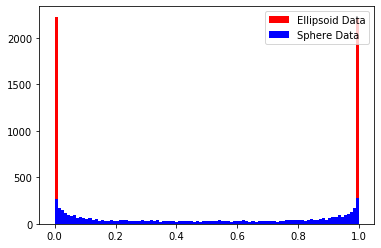

In [37]:
plt.figure()
bins = np.linspace(0, 1, 100)

plt.hist(ellipsoid_feature1,bins,color = 'red',label = 'Ellipsoid Data')
plt.hist(sphere_feature1,bins,color = 'blue', label = 'Sphere Data')

plt.legend(loc='upper right')

plt.show() #make the bar sizes the same!

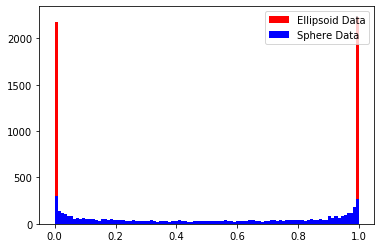

In [38]:
plt.figure()
bins = np.linspace(0, 1, 100)

plt.hist(ellipsoid_feature2,bins,color = 'red',label = 'Ellipsoid Data')
plt.hist(sphere_feature2,bins,color = 'blue', label = 'Sphere Data')

plt.legend(loc='upper right')

plt.show() #make the bar sizes the same!